In [123]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import time
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [124]:
class JobScraper:
    def __init__(self, db_name='jobs.db'):
        self.db_name = db_name
        self.conn = sqlite3.connect(self.db_name)
        self.cursor = self.conn.cursor()
        self.create_table()
    
    def drop_table(self):
        self.cursor.execute('DROP TABLE IF EXISTS Job')
        self.conn.commit()

    def create_table(self):
        self.drop_table()
        self.cursor.execute('''
        CREATE TABLE Job (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            salary TEXT,
            location TEXT
        )
        ''')
        self.conn.commit()

    def insert_job(self, name, salary, location):
        self.cursor.execute('''
        INSERT INTO Job (name, salary, location)
        VALUES (?, ?, ?)
        ''', (name, salary, location))
        self.conn.commit()

    def close_db(self):
        self.conn.close()

    def fetch_jobs(self, location):
        self.cursor.execute('SELECT name, salary FROM Job WHERE location=?', (location,))
        return self.cursor.fetchall()

    def scrape_jobs(self, url, prefecture_code, city_code, location_name):
        driver = webdriver.Chrome()
        driver.get(url)
        time.sleep(1)

        driver.find_element(By.CLASS_NAME, "retrieval_icn").click()
        time.sleep(1)

        element = driver.find_element(By.ID, "ID_tDFK1CmbBox")
        Select(element).select_by_value(prefecture_code)
        time.sleep(1)

        driver.find_element(By.ID, "ID_Btn").click()
        time.sleep(1)

        element = driver.find_element(By.ID, "ID_rank1CodeMulti")
        Select(element).select_by_value(city_code)
        time.sleep(1)

        driver.find_element(By.ID, "ID_ok").click()
        time.sleep(1)

        driver.find_element(By.ID, "ID_searchBtn").click()
        time.sleep(1)

        soup = BeautifulSoup(driver.page_source, "html.parser")
        jobs = soup.find_all("table", attrs={"class": "kyujin"})[1::]

        for job in jobs:
            job_name = str(job.find("td", attrs={"class": "m13"}).text.strip())
            salary_tags = job.find_all("tr", attrs={"class": "border_new"})[5].select(".disp_inline_block")
            job_salary = ""
            for salary_tag in salary_tags:
                job_salary = salary_tag.text
            self.insert_job(job_name, job_salary, location_name)

        driver.close()

In [125]:
scraper = JobScraper()
url = "https://www.hellowork.mhlw.go.jp/"

In [126]:
# 東京都千代田区の求人情報をスクレイピングして保存
scraper.scrape_jobs(url, '13', '13101', '東京都千代田区')

In [127]:
# 福岡県北九州市門司区の求人情報をスクレイピングして保存
scraper.scrape_jobs(url, '40', '40101', '福岡県北九州市門司区')

In [128]:
# 東京都千代田区の求人情報を取得して表示
tokyo_jobs = scraper.fetch_jobs('東京都千代田区')
print("東京都千代田区の求人情報:")
for job in tokyo_jobs:
    print(f"■{job[0]} （ {job[1]} ）")

東京都千代田区の求人情報:
■期間業務職員（一般事務・企画担当、財政運営基本担当） （  ）
■一般事務補助（期間業務職員）／国土政策局　地方政策課 （  ）
■一般事務（期間業務職員）（企画担当） （  ）
■【秘書課】臨時事務補助職員（フルタイム）４月採用 （  ）
■編集部員 （ 270,000円〜378,000円 ）
■設備管理業務／千代田区麹町／未経験者歓迎 （ 240,000円〜240,000円 ）
■運送会社向けＩＴツール開発（ＳＥ） （ 250,000円〜500,000円 ）
■ＪＡＶＡ（ＳＥ）エンジニア （ 300,000円〜650,000円 ）
■建築原価管理システム開発（ＳＥ） （ 250,000円〜500,000円 ）
■テスト評価技術者 （ 200,000円〜260,000円 ）
■ストレスチェックシステム開発（ＳＥ） （ 250,000円〜500,000円 ）
■一般事務（期間業務職員）（総括担当） （  ）
■車載機向けナビゲーション開発（ＳＥ） （ 250,000円〜500,000円 ）
■医療関係システム開発（ＳＥ） （ 250,000円〜500,000円 ）
■営業（広告）※一から丁寧に育成します （ 280,000円〜308,000円 ）
■電子作業記録システム開発（ＳＥ） （ 250,000円〜500,000円 ）
■顧客情報承認管理システム開発（ＳＥ） （ 250,000円〜500,000円 ）
■工業用ミシン組込システム開発（ＳＥ） （ 250,000円〜500,000円 ）
■政策調査員（非常勤）／消費者制度課 （ 1,826円〜3,008円 ）
■経理職（中堅） （ 250,000円〜400,000円 ）
■総務事務員【経験不問】 （ 220,000円〜250,000円 ）
■営業（直行直帰）：首都圏、大阪、広島、福岡 （ 250,000円〜300,000円 ）
■人材情報活用システム開発（ＳＥ） （ 250,000円〜500,000円 ）
■サービス管理用アプリケーション開発（ＳＥ） （ 250,000円〜500,000円 ）
■薬局物流システム開発（ＳＥ） （ 250,000円〜500,000円 ）
■外資系生保向けシステム開発（ＳＥ） （ 250,000円〜500,000円 ）
■営業職（管理職候補） （ 250

In [129]:
# 福岡県北九州市門司区の求人情報を取得して表示
kitakyushu_jobs = scraper.fetch_jobs('福岡県北九州市門司区')
print("福岡県北九州市門司区の求人情報:")
for job in kitakyushu_jobs:
    print(f"■{job[0]} （ {job[1]} ）")

福岡県北九州市門司区の求人情報:
■クリーンスタッフ／（門司／鳥巣病院） （  ）
■施設警備／北九州市門司区 （  ）
■機能訓練指導員／社ノ木デイサービスセンター （ 266,000円〜284,000円 ）
■清掃スタッフ／門司区／パート （ 1,010円〜1,010円 ）
■ガソリンスタンド責任者候補【業界未経験者可】 （ 340,000円〜340,000円 ）
■美容師／門司区 （ 210,000円〜323,500円 ）
■銅管製品製造・機械オペ　２交替／門司区 （ 232,500円〜232,500円 ）
■３月まで短期　印刷物の仕込み作業／門司区 （ 69,000円〜161,000円 ）
■ヤクルトスタッフ（雇用タイプ） （  ）
■清掃／門司区 （ 1,000円〜1,000円 ）
■夜間勤務専門介護職員／（門司区）共同生活援助事業所えん （ 1,300円〜1,500円 ）
■運転業務／兼業可 （ 1,000円〜1,200円 ）
■一般事務・営業事務（正社員） （ 180,000円〜280,000円 ）
■医療事務／準社員 （  ）
■業務推進・管理業務（正社員） （ 270,000円〜280,000円 ）
■登録ヘルパー／ふれんどヘルパーステーション （ 1,200円〜1,700円 ）
■看護職員／ふれんどケアセンター （ 1,250円〜1,350円 ）
■介護職員／ふれんどケアセンター （ 1,190円〜1,435円 ）
■介護職員／ふれんどケアセンター永黒 （ 1,190円〜1,435円 ）
■医療事務 （ 1,200円〜1,500円 ）
■調剤事務／柳原町／パート （ 1,000円〜1,000円 ）
■トレーラー運転手（北九州営業所） （ 388,800円〜388,800円 ）
■総合職（土木技術サポーター）（正）／北九州市 （ 242,800円〜439,720円 ）
■総合職（空調衛生設備技術サポーター）（正）／北九州市 （ 242,800円〜429,825円 ）
■施工図作成スタッフ（正）／北九州市 （ 192,000円〜315,000円 ）
■製造工場内作業員 （ 1,100円〜1,150円 ）
■総務事務員／正社員　《急募》 （ 190,000円〜210,000円 ）
■一般作業員／パート （ 1,000円〜1,000円 ）
■その他の施設

In [130]:
# 東京都千代田区の求人データ
tokyo_jobs = [
    ("期間業務職員（一般事務・企画担当、財政運営基本担当）", ""),
    ("一般事務補助（期間業務職員）／国土政策局 地方政策課", ""),
    ("一般事務（期間業務職員）（企画担当）", ""),
    ("【秘書課】臨時事務補助職員（フルタイム）４月採用", ""),
    ("編集部員", "270,000円~378,000円"),
    ("設備管理業務／千代田区麹町／未経験者歓迎", "240,000円~240,000円"),
    ("運送会社向けＩＴツール開発（ＳＥ）", "250,000円~500,000円"),
    ("ＪＡＶＡ（ＳＥ）エンジニア", "300,000円~650,000円"),
    ("建築原価管理システム開発（ＳＥ）", "250,000円~500,000円"),
    ("テスト評価技術者", "200,000円~260,000円"),
    ("ストレスチェックシステム開発（ＳＥ）", "250,000円~500,000円"),
    ("一般事務（期間業務職員）（総括担当）", ""),
    ("車載機向けナビゲーション開発（ＳＥ）", "250,000円~500,000円"),
    ("医療関係システム開発（ＳＥ）", "250,000円~500,000円"),
    ("営業（広告）※一から丁寧に育成します", "280,000円~308,000円"),
    ("電子作業記録システム開発（ＳＥ）", "250,000円~500,000円"),
    ("顧客情報承認管理システム開発（ＳＥ）", "250,000円~500,000円"),
    ("工業用ミシン組込システム開発（ＳＥ）", "250,000円~500,000円"),
    ("政策調査員（非常勤）／消費者制度課", "1,826円~3,008円"),
    ("経理職（中堅）", "250,000円~400,000円"),
    ("総務事務員【経験不問】", "220,000円~250,000円"),
    ("営業（直行直帰）：首都圏、大阪、広島、福岡", "250,000円~300,000円"),
    ("人材情報活用システム開発（ＳＥ）", "250,000円~500,000円"),
    ("サービス管理用アプリケーション開発（ＳＥ）", "250,000円~500,000円"),
    ("外資系生保向けシステム開発（ＳＥ）", "250,000円~500,000円"),
    ("営業職（管理職候補）", "250,000円~450,000円"),
    ("総務職（管理職候補）", "250,000円~400,000円"),
    ("清掃スタッフ（４ｈ）／千代田区神田小川町", "1,300円~1,300円")
]

# 福岡県北九州市門司区の求人データ
kitakyushu_jobs = [
    ("施設警備／北九州市門司区", ""),
    ("機能訓練指導員／社ノ木デイサービスセンター", "266,000円~284,000円"),
    ("清掃スタッフ／門司区／パート", "1,010円~1,010円"),
    ("ガソリンスタンド責任者候補【業界未経験者可】", "340,000円~340,000円"),
    ("美容師／門司区", "210,000円~323,500円"),
    ("銅管製品製造・機械オペ ２交替／門司区", "232,500円~232,500円"),
    ("３月まで短期 印刷物の仕込み作業／門司区", "69,000円~161,000円"),
    ("ヤクルトスタッフ（雇用タイプ）", ""),
    ("清掃／門司区", "1,000円~1,000円"),
    ("夜間勤務専門介護職員／（門司区）共同生活援助事業所えん", "1,300円~1,500円"),
    ("運転業務／兼業可", "1,000円~1,200円"),
    ("一般事務・営業事務（正社員）", "180,000円~280,000円"),
    ("医療事務／準社員", ""),
    ("業務推進・管理業務（正社員）", "270,000円~280,000円"),
    ("登録ヘルパー／ふれんどヘルパーステーション", "1,200円~1,700円"),
    ("看護職員／ふれんどケアセンター", "1,250円~1,350円"),
    ("介護職員／ふれんどケアセンター", "1,190円~1,435円"),
    ("介護職員／ふれんどケアセンター永黒", "1,190円~1,435円"),
    ("医療事務", "1,200円~1,500円"),
    ("調剤事務／柳原町／パート", "1,000円~1,000円"),
    ("トレーラー運転手（北九州営業所）", "388,800円~388,800円"),
    ("総合職（土木技術サポーター）（正）／北九州市", "242,800円~439,720円"),
    ("総合職（空調衛生設備技術サポーター）（正）／北九州市", "242,800円~429,825円"),
    ("施工図作成スタッフ（正）／北九州市", "192,000円~315,000円"),
    ("総務事務員／正社員 《急募》", "190,000円~210,000円"),
    ("一般作業員／パート", "1,000円~1,000円"),
    ("その他の施設介護の職員", "1,200円~1,250円"),
    ("販売員／海峡プラザ内《急募》", "1,100円~1,100円")
]


In [131]:
#データフレームに変換
tokyo_df = pd.DataFrame(tokyo_jobs, columns=['Name', 'Salary'])
tokyo_df['Location'] = 'Chiyoda Ward'

kitakyushu_df = pd.DataFrame(kitakyushu_jobs, columns=['Name', 'Salary'])
kitakyushu_df['Location'] = 'Moji Ward'

In [132]:
# データフレームを結合
jobs_df = pd.concat([tokyo_df, kitakyushu_df], ignore_index=True)

In [133]:
# 給与データを数値に変換
jobs_df['Salary'] = jobs_df['Salary'].str.replace('円', '', regex=False)
jobs_df['Salary'] = jobs_df['Salary'].str.replace(',', '', regex=False)
jobs_df['Salary'] = jobs_df['Salary'].str.split('~').str[0].str.strip()
jobs_df['Salary'] = pd.to_numeric(jobs_df['Salary'], errors='coerce')

In [134]:
# 給与がNaNの行を削除
jobs_df = jobs_df.dropna(subset=['Salary'])

In [135]:
# データの内容を表示して確認
print(jobs_df.head())

                   Name    Salary      Location
4                  編集部員  270000.0  Chiyoda Ward
5  設備管理業務／千代田区麹町／未経験者歓迎  240000.0  Chiyoda Ward
6     運送会社向けＩＴツール開発（ＳＥ）  250000.0  Chiyoda Ward
7         ＪＡＶＡ（ＳＥ）エンジニア  300000.0  Chiyoda Ward
8      建築原価管理システム開発（ＳＥ）  250000.0  Chiyoda Ward


In [136]:
# 給与データがゼロの行を除外する
jobs_df = jobs_df[jobs_df['Salary'] > 0]

In [137]:
# 給与が0または極端に低いデータを除外する
jobs_df = jobs_df[jobs_df['Salary'] > 10000]

In [138]:
# 給与データをログ変換
jobs_df['Log Salary'] = np.log(jobs_df['Salary'])

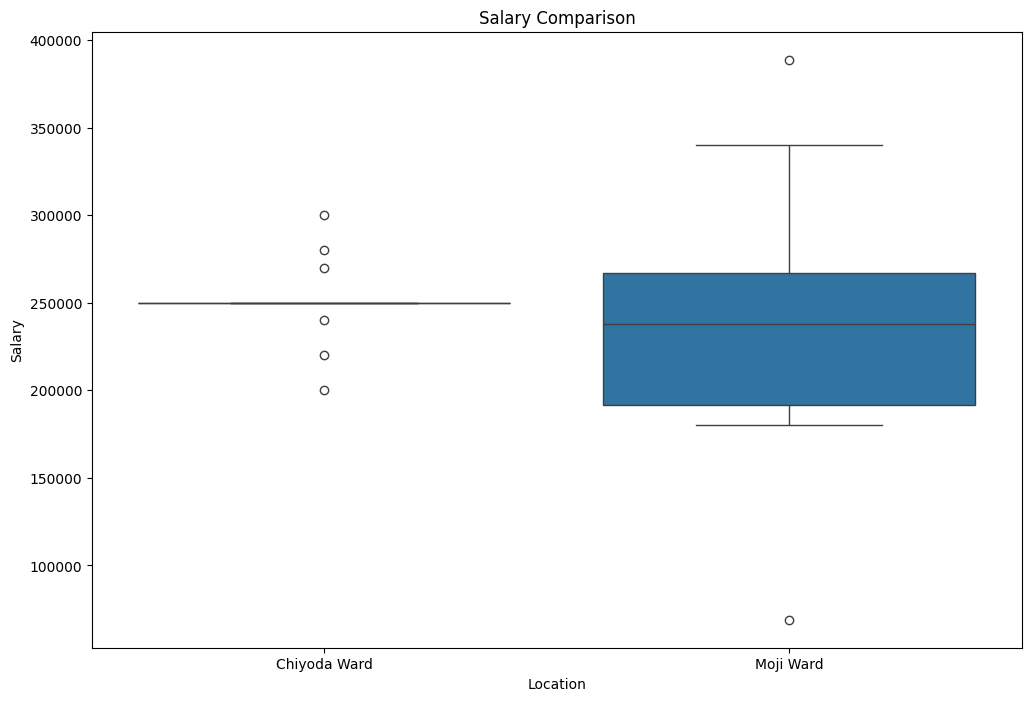

In [139]:
# データを視覚化する
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='Salary', data=jobs_df)
plt.title('Salary Comparison')
plt.xlabel('Location')  
plt.ylabel('Salary')   
plt.show()

In [140]:
scraper.close_db()